### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

import re
import os


[nltk_data] Downloading package punkt to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
%cd Text-Classification-Using-TF-IDF/

/teamspace/studios/this_studio/Text-Classification-Using-TF-IDF


In [5]:
!unzip vietnamese_document_data.zip -d data

Archive:  vietnamese_document_data.zip
   creating: data/document_data/
  inflating: data/document_data/notes.txt  
   creating: data/document_data/Chinh tri Xa hoi/
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (34).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (37).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_NLD_ (3819).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (47).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (55).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (62).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (63).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (64).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_NLD_ (3827).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (71).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (73).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (91).txt  
  inflating: d


  inflating: data/document_data/Chinh tri Xa hoi/XH_NLD_ (5268).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_TT_ (2621).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_TT_ (2650).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_TT_ (2652).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_TT_ (2677).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_TT_ (2696).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_TT_ (2747).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_TT_ (2771).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_TT_ (2797).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_TT_ (2802).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_TT_ (2803).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_TT_ (2830).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_TT_ (2834).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_TT_ (2550).txt  
  inflating: data/document_data/

### Set path for all data folder

In [4]:
path = "data/document_data"
folders = os.listdir(path)
print(folders)

['Chinh tri Xa hoi', 'Doi song', 'Khoa hoc', 'Kinh doanh', 'Phap luat', 'Suc khoe', 'The gioi', 'The thao', 'Van hoa', 'Vi tinh', 'notes.txt']


### create labels for each folder

In [5]:
class_labels = {}
for idx, folder in enumerate(folders):
    #print(idx, folder)
    if folder == 'notes.txt':
        continue
    class_labels[folder] = idx
print(class_labels)

{'Chinh tri Xa hoi': 0, 'Doi song': 1, 'Khoa hoc': 2, 'Kinh doanh': 3, 'Phap luat': 4, 'Suc khoe': 5, 'The gioi': 6, 'The thao': 7, 'Van hoa': 8, 'Vi tinh': 9}


### Function to extract text 

In [6]:
path_ex = "data/document_data/Chinh tri Xa hoi/XH_NLD_ (3672).txt"

def read_extract_text_file(path):
    with open(path, 'r', encoding='utf-16') as file:
        data = file.readlines()
        text_data = " ".join(data)
    return text_data

text = read_extract_text_file(path_ex)
print(text)


 Thành lập dự án POLICY phòng chống HIV/AIDS ở VN (NLĐ)- Quỹ hỗ trợ khẩn cấp về AIDS của Hoa Kỳ vừa thành lập dự án POLICY tại VN với cam kết hỗ trợ Chính phủ và nhân dân VN đối phó HIV/AIDS.Dự án có nhiệm vụ chính là cải thiện công tác phòng chống HIV/AIDS thông qua các lĩnh vực xây dựng chính sách, rà soát các văn bản pháp luật, xây dựng chiến lược quảng bá, xây dựng chương trình đào tạo về phòng chống HIV/AIDS, lên kế hoạch bố trí nguồn lực, huấn luyện và nghiên cứu về phương tiện truyền thông đại chúng, tổ chức các hoạt động nhằm giảm kỳ thị và phân biệt đối xử đối với người có HIV/AIDS... Theo TTXVN, dự án POLICY đặc biệt quan tâm đến công tác truyền thông phòng chống HIV/AIDS, coi đây là một biện pháp tích cực và hữu hiệu trong việc phòng chống có hiệu quả HIV/AIDS. Thời gian tới, dự án POLICY sẽ tiếp tục tổ chức các hoạt động nhằm nâng cao nhận thức cho những người có trách nhiệm với công tác chỉ đạo phòng chống HIV/AIDS.
 



### Join all data and label them

In [7]:
final_text = []
final_label = []
path = "data/document_data"

for label in folders:
    label_path = os.path.join(path,label)
    if label_path.endswith("notes.txt"):
        continue
    else:
        for j in os.listdir(label_path):
            print(j)
            txt_path = os.path.join(label_path,j)
            text = read_extract_text_file(txt_path)
            final_text.append(text)
            final_label.append(class_labels[label])
# it takes about 6 to 7 minutes to run

XH_NLD_ (3672).txt
XH_NLD_ (3673).txt
XH_NLD_ (3674).txt
XH_NLD_ (3675).txt
XH_NLD_ (3676).txt
XH_NLD_ (3677).txt
XH_NLD_ (3678).txt
XH_NLD_ (3679).txt
XH_NLD_ (3680).txt
XH_NLD_ (3681).txt
XH_NLD_ (3682).txt
XH_NLD_ (3683).txt
XH_NLD_ (3684).txt
XH_NLD_ (3685).txt
XH_NLD_ (3686).txt
XH_NLD_ (3687).txt
XH_NLD_ (3688).txt
XH_NLD_ (3689).txt
XH_NLD_ (3690).txt
XH_NLD_ (3691).txt
XH_NLD_ (3692).txt
XH_NLD_ (3693).txt
XH_NLD_ (3694).txt
XH_NLD_ (3695).txt
XH_NLD_ (3696).txt
XH_NLD_ (3697).txt
XH_NLD_ (3698).txt
XH_NLD_ (3699).txt
XH_NLD_ (3700).txt
XH_NLD_ (3701).txt
XH_NLD_ (3702).txt
XH_NLD_ (3703).txt
XH_NLD_ (3704).txt
XH_NLD_ (3705).txt
XH_NLD_ (3706).txt
XH_NLD_ (3707).txt
XH_NLD_ (3708).txt
XH_NLD_ (3709).txt
XH_NLD_ (3710).txt
XH_NLD_ (3711).txt
XH_NLD_ (3712).txt
XH_NLD_ (3713).txt
XH_NLD_ (3714).txt
XH_NLD_ (3715).txt
XH_NLD_ (3716).txt
XH_NLD_ (3717).txt
XH_NLD_ (3718).txt
XH_NLD_ (3719).txt
XH_NLD_ (3720).txt
XH_NLD_ (3721).txt
XH_NLD_ (3722).txt
XH_NLD_ (3723).txt
XH_NLD_ (372

DS_TN_ (4270).txt
DS_TN_ (4277).txt
DS_TN_ (4283).txt
DS_TN_ (4289).txt
DS_TN_ (4290).txt
DS_TN_ (4297).txt
DS_TN_ (4298).txt
DS_TN_ (4300).txt
DS_TN_ (4301).txt
DS_TN_ (4302).txt
DS_TN_ (4308).txt
DS_TN_ (4316).txt
DS_TN_ (4317).txt
DS_TN_ (4323).txt
DS_TN_ (4325).txt
DS_TN_ (4327).txt
DS_TN_ (4328).txt
DS_TN_ (4334).txt
DS_TN_ (4335).txt
DS_TN_ (4337).txt
DS_TN_ (4344).txt
DS_TN_ (4345).txt
DS_TN_ (4355).txt
DS_TN_ (4357).txt
DS_TN_ (4358).txt
DS_TN_ (4360).txt
DS_TN_ (4366).txt
DS_TN_ (4367).txt
DS_TN_ (4370).txt
DS_TN_ (4377).txt
DS_TN_ (4378).txt
DS_TN_ (4385).txt
DS_TN_ (4386).txt
DS_TN_ (4387).txt
DS_TN_ (4396).txt
DS_TN_ (4403).txt
DS_TN_ (4404).txt
DS_TN_ (4410).txt
DS_TN_ (4411).txt
DS_TN_ (4412).txt
DS_TN_ (4418).txt
DS_TN_ (4425).txt
DS_TN_ (4431).txt
DS_TN_ (4432).txt
DS_TN_ (4438).txt
DS_TN_ (4439).txt
DS_TN_ (4440).txt
DS_TN_ (4441).txt
DS_TN_ (4448).txt
DS_TN_ (4450).txt
DS_TN_ (4459).txt
DS_TN_ (4460).txt
DS_TN_ (4461).txt
DS_TN_ (4462).txt
DS_TN_ (4468).txt
DS_TN_ (44

In [8]:
print(len(final_text))
print(len(final_label))

33759
33759


### Convert them into DataFrame and save into csv file

In [9]:
df = pd.DataFrame()
df['Text'] = final_text
df['Label'] = final_label
df.head()

,Text,Label
0,Thành lập dự án POLICY phòng chống HIV/AIDS ở...,0
1,Hơn 16.000 khách đến vịnh Nha Trang Theo trực...,0
2,TPHCM: Khai trương dịch vụ lặn biển săn cá mậ...,0
3,Du lịch VN sẽ có tư vấn nước ngoài Ông Phạm T...,0
4,Quy chế tuyển sinh 2006: Không làm tròn điểm ...,0


In [ ]:
df.to_csv("vietnamese_document_data.csv",index=False)

In [3]:
df = pd.read_csv('vietnamese_document_data.csv')
df.head()

,Text,Label
0,Rắc rối chuyện Ngô Quang Huy!\n Với danh sách...,0
1,HLV Scolari: 'Cần phải dè chừng Nistelrooy' \n...,0
2,Sol Campbell đã trở lại\n Tờ London Evening S...,0
3,"Ngày 18-1, bầu Đức phải làm việc với C14 Chủ ...",0
4,Roddick và Henman cùng bị loại khỏi Paris Mast...,0


In [11]:
df['Label'].value_counts().sort_index()

Label
0     5298
1     3868
3     3080
4     2481
5     2898
6     3159
7     3384
8     1820
9     2552
10    5219
Name: count, dtype: int64

### Exploration Data Analysis

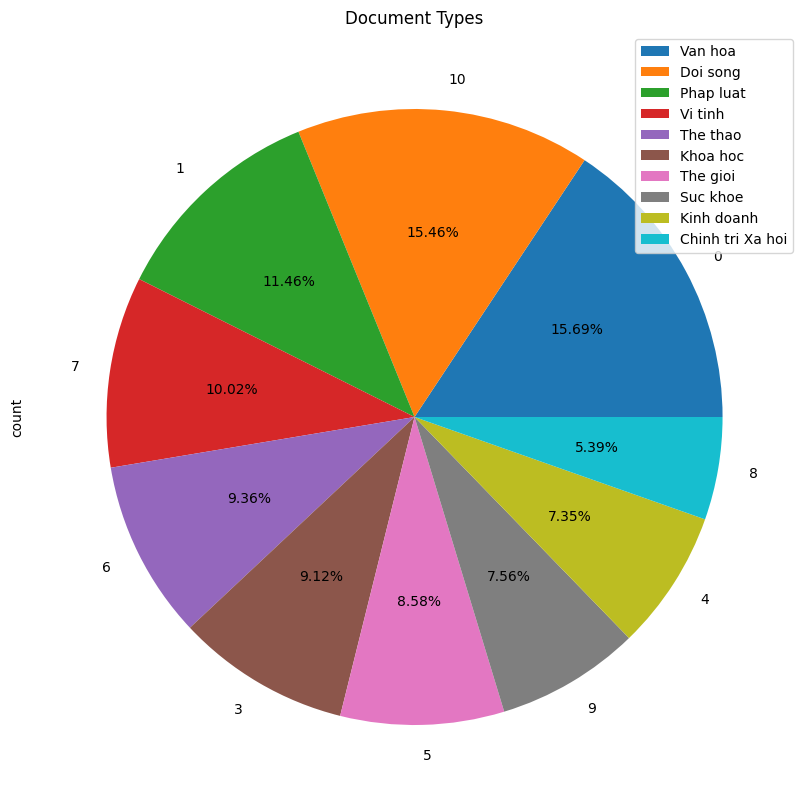

In [11]:
plt.figure(figsize=(10, 10))
df['Label'].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.title("Document Types")
plt.legend(class_labels.keys())
plt.show()

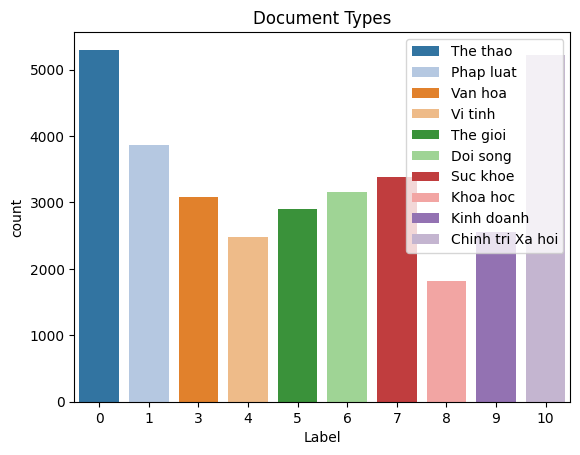

In [27]:
sns.countplot(data=df, x=df['Label'], palette=palette)
plt.title("Document Types")
plt.legend(class_labels.keys())
plt.show()

### Data Preprocessing

In [12]:
# read all vietnamese stopwords from file
def read_stopwords(path):
    with open(path, 'r', encoding='utf-8') as file:
        stopwords = [line.strip() for line in file]
    return stopwords

stopwords_file_path = 'stopwords_vn.txt'
stopwords_list = read_stopwords(stopwords_file_path)


print(len(stopwords_list))

1942


In [13]:
# All text is kind of clean
import re
def preprocess_data(text):
    text = text.lower()
    text = re.sub("\s+"," ",text)

    # tokens
    tokens = word_tokenize(text)
    
    # remove punctuation and stopword
    data = [i for i in tokens if i not in punctuation]
    data = [i for i in data if i not in stopwords_list]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    final_text = []
    for i in data:
        word = lemmatizer.lemmatize(i)
        final_text.append(word)
        
    return " ".join(final_text)

In [14]:
x_train, x_test,y_train,y_test = train_test_split(df['Text'],df['Label'],test_size=0.2, shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27007,)
(6752,)
(27007,)
(6752,)


In [16]:
x_train

30826     Tăng cường tuần tra, kiểm soát tại 44 tuyến đ...
23135     Tôi 25 tuổi, bị viêm họng hạt mãn tính đã 5 n...
32144     Tháng 2: Hơn 1.000 người chết vì tai nạn giao...
13268     FPT ELEAD trở thành đối tác OEM của Seagate \...
8895     Hơn 100 phương tiện đua xe máy trái phép ở Bìn...
                               ...                        
10203    Anh Tú và vở kịch đầu tay 'Vũ nữ đêm giao thừa...
24789    Phóng viên Thanh Niên đã có buổi trao đổi với ...
25116    Phòng thí nghiệm trọng điểm công nghệ gene ra ...
13485    Độ bền của thẻ nhớ vượt xa dự kiến\n Nếu bạn t...
23137    Gương mặt đẹp mùa hè\n Vào mùa hè, bạn nên chọ...
Name: Text, Length: 27007, dtype: object

In [17]:
y_train

30826    10
23135     7
32144    10
13268     4
8895      1
         ..
10203     3
24789     8
25116     8
13485     4
23137     7
Name: Label, Length: 27007, dtype: int64

In [18]:
clean_train = x_train.apply(preprocess_data)
clean_test = x_test.apply(preprocess_data)
# it takes about 7 minutes to run

In [19]:
clean_train

28944    hàng nghìn ha rừng đà nẵng nguy chết trụi dây ...
4326     bóng đá nam việt nam lào 8 2 lịch sử đối đầu 1...
20082    9 biểu hiện chàng thú chàng yêu say mê yên học...
18230    dạo quanh cửa hàng siêu thị khu buôn hàng giá ...
29915    tỉnh xuất hiện dịch cúm hải dương hai phát dịc...
                               ...                        
31215    đề nghị phủ trình phương án nhân 5 đại hội đản...
9960     nicole kidman cặp kè bồ cũ liz hurley chàng tỷ...
29406    chỉnh thu học phí trường công nlđ phó chủ tịch...
6472     phát hiện kẻ trộm vụ vi phạm luật giao thông n...
18711    nửa kỷ trôi nhắc màu tím hoa sim tâm hồn lão t...
Name: Text, Length: 27007, dtype: object

In [20]:
clean_test

11032    chương tử di hàng hiệu gợi cảm quyến rũ giới c...
29253    giá trị quyền sử dụng đất giá trị dn dnnn giao...
8310     lập cảnh sát mạng vn đòi trình hội nhập công a...
19244    văn chóng ly dị vợ sống phụ nữ tình nguyện vợ ...
18661    nỗi niềm hà nội xứ đất sài gòn đô hội góc món ...
                               ...                        
8784     nguyên phó phòng cảnh sát kinh tế kon tum bắt ...
14036    sâu bizex công instant messenger virus xâm nhậ...
2891     samuel eto o giúp barcelona tái lập đêm đội bó...
1198     hlv clb manchester united án lđbđ fa kỷ luật p...
23887    nam ngụ q.1 tp hồ chí minh 1 chiều 27.10.2005 ...
Name: Text, Length: 6752, dtype: object

### WordCloud

In [18]:
def generate_wordcloud(data,column):
    str_text=data[column].str.cat(sep=" ")
    wordcloud=WordCloud(width=500,height=300,background_color='Gold').generate(str_text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [19]:
generate_wordcloud(df,"Text")

: 

### term frequency – inverse document frequency (TF-IDF)

In [21]:
tfidf = TfidfVectorizer(ngram_range=(1,3),max_df=0.95,max_features=15000)
tfidf_train = tfidf.fit_transform(clean_train)
tfidf_test = tfidf.transform(clean_test)

### A is sparse matrix - Tf-idf-weighted document-term matrix.

In [22]:
tfidf_train.A.shape

(27007, 15000)

In [23]:
tfidf_train.A

array([[0.        , 0.03812437, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.3065005 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Apply SVD

In [24]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5000)
tfidf_train = svd.fit_transform(tfidf_train)
tfidf_test = svd.transform(tfidf_test)


In [25]:
tfidf_train.shape

(27007, 5000)

In [27]:
lg_model = LogisticRegression()
lg_model.fit(tfidf_train, y_train)

LogisticRegression()

In [29]:
y_pred = lg_model.predict(tfidf_test)
y_pred

array([ 6, 10,  4, ...,  0,  0,  7])

In [30]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))
print()
print(f"Accuracy On Test Data: {accuracy_score(y_test,y_pred)*100:.2f}")

Confusion Matrix:
 [[1014    0    3    0    2    2    1    0    0    5]
 [   3  695    4    2    1    3    3    1    8   49]
 [   1    1  570    0    4   13    1    1    1   24]
 [   0    2    2  452    7    0    1    9   13   10]
 [   4    4    7    4  503    5   10    7    8   16]
 [   2    4   18    3    3  516   11    9    5   27]
 [   1    2    0    0    6    9  647    3    2    9]
 [   1    1    5    3    5   14   22  317    3   25]
 [   0    4    1    8    3    3    1    1  442   34]
 [   3   42    8    7    9   44   17    4   35  937]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1027
           1       0.92      0.90      0.91       769
           3       0.92      0.93      0.92       616
           4       0.94      0.91      0.93       496
           5       0.93      0.89      0.91       568
           6       0.85      0.86      0.86       598
           7       0.91      0.95      0.93   

In [31]:
labels = list(class_labels.keys())
labels

['Van hoa',
 'Doi song',
 'Phap luat',
 'Vi tinh',
 'The thao',
 'Khoa hoc',
 'The gioi',
 'Suc khoe',
 'Kinh doanh',
 'Chinh tri Xa hoi']

### Cross-Validation

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lg_model, tfidf_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean()}")

Cross-validation accuracy: 0.9061354867230491


## Not apply SVD

In [39]:
tfidf = TfidfVectorizer(ngram_range=(1,3),max_df=0.95,max_features=15000)
tfidf_train_n = tfidf.fit_transform(clean_train)
tfidf_test_n = tfidf.transform(clean_test)

In [40]:
lg_model_n = LogisticRegression()
lg_model_n.fit(tfidf_train_n, y_train)

LogisticRegression()

In [42]:
y_pred_n = lg_model_n.predict(tfidf_test_n)
y_pred_n

array([ 6, 10,  4, ...,  0,  0,  7])

In [43]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_n))
print()
print("Classification Report:\n",classification_report(y_test,y_pred_n))
print()
print(f"Accuracy On Test Data: {accuracy_score(y_test,y_pred_n)*100:.2f}")

Confusion Matrix:
 [[1014    0    3    0    2    2    1    0    0    5]
 [   3  695    3    2    1    4    3    1    8   49]
 [   1    1  569    0    4   14    1    1    1   24]
 [   0    2    2  452    7    0    1   10   12   10]
 [   4    3    7    4  504    5   10    7    8   16]
 [   2    4   20    3    3  515   10    8    5   28]
 [   1    2    0    0    6    9  647    3    2    9]
 [   0    1    5    4    4   14   22  317    3   26]
 [   0    4    1    8    3    3    1    1  441   35]
 [   3   41    8    7   10   43   17    4   33  940]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1027
           1       0.92      0.90      0.91       769
           3       0.92      0.92      0.92       616
           4       0.94      0.91      0.93       496
           5       0.93      0.89      0.91       568
           6       0.85      0.86      0.85       598
           7       0.91      0.95      0.93   

In [49]:
def predict_result(path):
    text_data = read_extract_text_file(path)
    clean_text_data = preprocess_data(text_data)
    
    tfidf_data = tfidf.transform([clean_text_data])
    y_pred = lg_model_n.predict(tfidf_data.A)
    result = f"Given Document Is Related To : {labels[y_pred[0]]}"
    return result

In [50]:
path_test = "ex.txt"
predict_result(path_test)

'Given Document Is Related To : Chinh tri Xa hoi'

## PHOBERT

In [4]:
import torch
from transformers import AutoModel, AutoTokenizer
import pytorch_lightning as pl
import pandas as pd
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
import torch

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [6]:
phobert = AutoModel.from_pretrained("./phobert-base", local_files_only=True).to(device)
phobert_tokenizer = AutoTokenizer.from_pretrained("./phobert-base", use_fast=True, local_files_only=True)

In [7]:
df.head()

,Text,Label
0,Rắc rối chuyện Ngô Quang Huy!\n Với danh sách...,0
1,HLV Scolari: 'Cần phải dè chừng Nistelrooy' \n...,0
2,Sol Campbell đã trở lại\n Tờ London Evening S...,0
3,"Ngày 18-1, bầu Đức phải làm việc với C14 Chủ ...",0
4,Roddick và Henman cùng bị loại khỏi Paris Mast...,0


In [24]:
cleaned_text = df.Text.apply(preprocess_data)

with open('cleaned_text.txt', 'w') as file:
    for line in cleaned_text:
        file.writelines(line)

In [9]:
cleaned_text = []
with open('cleand_text.txt', 'r') as f:
    for txt in f.readlines():
        cleaned_text.append(txt)

In [8]:
texts = df.Text
print(texts)
texts = texts.to_list()
labels = df.Label.to_list()
len(df)

0         Rắc rối chuyện Ngô Quang Huy!\n Với danh sách...
1        HLV Scolari: 'Cần phải dè chừng Nistelrooy' \n...
2         Sol Campbell đã trở lại\n Tờ London Evening S...
3         Ngày 18-1, bầu Đức phải làm việc với C14 Chủ ...
4        Roddick và Henman cùng bị loại khỏi Paris Mast...
                               ...                        
33754    Quả là bất ngờ đến kinh ngạc khi phỏng vấn nha...
33755     Khẩn trương xây dựng thí điểm tập đoàn báo ch...
33756     Đào tạo 20 thạc sĩ và tiến sĩ ở nước ngoài (N...
33757     Tham quan vùng biển vịnh Nha Trang phải mua v...
33758     Sông Ba gây sạt lở chân móng QL1A (NLĐ)- Ông ...
Name: Text, Length: 33759, dtype: object


33759

In [9]:
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()
        assert input_ids.shape[0] == attention_mask.shape[0] == self.max_length

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'label': torch.tensor(label, dtype=torch.float)
        }

In [10]:
class BERTDataModule(pl.LightningDataModule):
    def __init__(self, texts, labels, batch_size, max_length, num_workers):
        super().__init__()
        self.texts = texts
        self.labels = labels
        self.batch_size = batch_size
        self.max_length = max_length
        self.tokenizer = phobert_tokenizer
        self.num_workers = num_workers

    def setup(self, stage=None):
        texts_train, texts_val, labels_train, labels_val = train_test_split(self.texts, self.labels, test_size=0.2, random_state=0)
        texts_test, texts_val, labels_test, labels_val = train_test_split(self.texts, self.labels, test_size=0.25, random_state=0)
        self.train_dataset = CustomDataset(texts_train, labels_train, self.tokenizer, self.max_length)
        self.val_dataset = CustomDataset(texts_val, labels_val, self.tokenizer, self.max_length)
        self.test_dataset = CustomDataset(texts_test, labels_test, self.tokenizer, self.max_length)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True, num_workers=self.num_workers)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size, num_workers=self.num_workers)

    def test_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size, num_workers=self.num_workers)

In [11]:
class BERTClassifier(pl.LightningModule):
    def __init__(self, learning_rate=2e-5):
        super(BERTClassifier, self).__init__()
        self.bert = phobert
        self.linear1 = torch.nn.Linear(self.bert.config.hidden_size, 50)
        self.linear2 = torch.nn.Linear(50, 10)
        self.linear3 = torch.nn.Linear(10, 1)
        self.learning_rate = learning_rate

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        #print(outputs.last_hidden_state.shape)
        linear1 = self.linear1(outputs.last_hidden_state[:, 0])
        linear2 = self.linear2(linear1)
        linear3 = self.linear3(linear2)
        return linear3

    def training_step(self, batch, batch_idx):
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = torch.reshape(batch['label'], (-1, 1))
        print("1")
        predicted_value = self(input_ids, attention_mask)
        loss = F.mse_loss(predicted_value, labels)
        self.log("train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = torch.reshape(batch['label'], (-1, 1))

        predicted_value = self(input_ids, attention_mask)
        val_loss = F.mse_loss(predicted_value, labels)
        self.log("val_loss", val_loss, on_step=False, on_epoch=True, prog_bar=True)
        return val_loss

    def test_step(self, batch, batch_idx):
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = torch.reshape(batch['label'], (-1, 1))

        predicted_value = self(input_ids, attention_mask)
        test_loss = F.mse_loss(predicted_value, labels)
        self.log("test_loss", test_loss, on_step=False, on_epoch=True, prog_bar=True)
        return test_loss

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate)
        return optimizer


In [13]:
batch_size = 64
max_length = 256
num_workers = 4

data_module = BERTDataModule(texts, labels, batch_size, max_length, num_workers)
model = BERTClassifier()

In [14]:
model_checkpoint = ModelCheckpoint(dirpath='checkpoint/',
                                   monitor="val_loss",
                                   verbose=True,
                                   mode="min",
                                   save_top_k=1
                                   )
early_stopping = EarlyStopping(monitor="val_loss", mode="min", min_delta=1e-4, patience=5)
callbacks = [model_checkpoint, early_stopping]

trainer = pl.Trainer(max_epochs=3, detect_anomaly=True, callbacks=callbacks)
trainer.fit(model, data_module)

You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type         | Params
-----------------------------------------
0 | bert    | RobertaModel | 134 M 
1 | linear1 | Linear       | 38.5 K
2 | linear2 | Linear       | 510   
3 | linear3 | Linear       | 11    
-----------------------------------------
135 M     Trainable params
0         Non-trainable params
135 M     Total params
540.149   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 422: 'val_loss' reached 5.90281 (best 5.90281), saving model to '/teamspace/studios/this_studio/Text-Classification-Using-TF-IDF/checkpoint/epoch=0-step=422.ckpt' as top 1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 844: 'val_loss' reached 2.30314 (best 2.30314), saving model to '/teamspace/studios/this_studio/Text-Classification-Using-TF-IDF/checkpoint/epoch=1-step=844.ckpt' as top 1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 1266: 'val_loss' reached 1.97963 (best 1.97963), saving model to '/teamspace/studios/this_studio/Text-Classification-Using-TF-IDF/checkpoint/epoch=2-step=1266.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=3` reached.


In [15]:
print("finished training")

finished training


In [16]:
test_results = trainer.test(model, datamodule = data_module)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.9796321392059326     │
└───────────────────────────┴───────────────────────────┘